In [1]:
import pandas as pd

file_name = 'processing_ready_data.xlsx'
df = pd.read_excel(io=file_name)

df_no_outliers = df[df.weekly_minutes < 500]

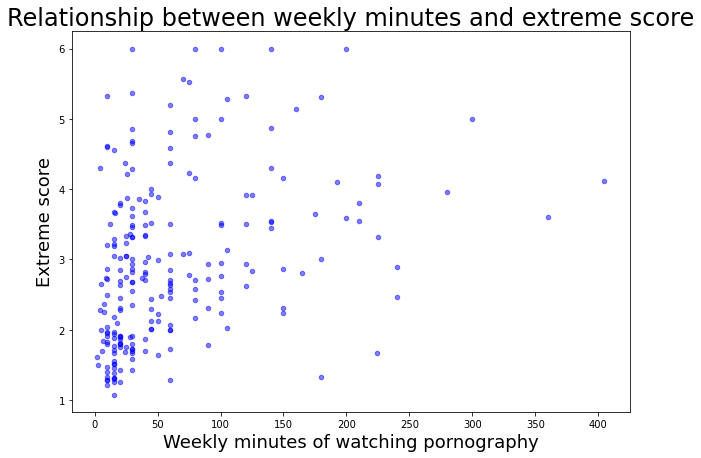

In [12]:
import matplotlib.pyplot as plt

ax1 = df_no_outliers.plot(kind='scatter', x='weekly_minutes', y='extreme_score', color='blue', alpha=0.5, figsize=(10, 7))
plt.title('Relationship between weekly minutes and extreme score', size=24)
plt.xlabel('Weekly minutes of watching pornography', size=18)
plt.ylabel('Extreme score', size=18)

In [29]:
# MULTIPLE LINEAR REGRESSION - WEEKLY MINUTES AND EXTREME SCORE TO PREDICT SEXUAL LIFE

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(df_no_outliers[['weekly_minutes', 'extreme_score']], df_no_outliers['sexual_life'])

print(f'Intercept: {round(mlr.intercept_, 4)}')
mlr_coefs = [round(coef, 4) for coef in mlr.coef_]
print(f'Coef weekly minutes: {mlr_coefs[0]}, coef extreme score: {mlr_coefs[1]}')

Intercept: 5.5452
Coef weekly minutes: -0.0055, coef extreme score: 0.0718


In [30]:
# LINEAR REGRESSION - EXTREME SCORE TO PREDICT WEEKLY MINUTES
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df_no_outliers[['extreme_score']], df_no_outliers['weekly_minutes'])

print(f'Intercept: {round(lr.intercept_, 4)}')
print(f'Coef: {round(lr.coef_[0], 4)}')

Intercept: 3.0778
Coef: 20.0591


In [31]:
# LINEAR REGRESSION - WEEKLY MINUTES TO PREDICT EXTREME SCORE

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(df_no_outliers[['weekly_minutes']], df_no_outliers['extreme_score'])

print(f'Intercept: {round(lr.intercept_, 4)}')
print(f'Coef: {round(lr.coef_[0], 4)}')

Intercept: 2.5538
Coef: 0.0062
